<h1>Training 1D CNN Model on Single Channel Data</h1>

In [1]:
import time
import numpy as np
import pandas as pd
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
from collections import Counter

warnings.filterwarnings("ignore")
seed=0

In [2]:
datapath = "Epileptic_Seizure_Recognition.csv"
data = pd.read_csv(datapath, header=0, index_col=0)

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [5]:
data.shape

(11500, 179)

In [6]:
data["y"] = data["y"].apply(lambda x: 1 if x == 1 else 0)
x_data = data.iloc[:, :178]
y_data = data["y"]

In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [8]:
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

In [9]:
x_data

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [10]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=seed)

In [11]:
smote = SMOTE(random_state=seed)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_val, y_train_val)

In [12]:
Counter(y_train_val)

Counter({0: 7346, 1: 1854})

In [13]:
Counter(y_train_resampled)

Counter({0: 7346, 1: 7346})

In [14]:
def create_model():
    model = Sequential()
    model.add(Conv1D(20, 5, activation='relu', input_shape=(178, 1)))
    model.add(Dropout(0.5))
    model.add(Conv1D(20, 5, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv1D(20, 5, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=16, verbose=1)

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=seed)
test_scores = []  
test_recalls = []  
test_specificities = []  
val_scores = []  
val_recalls = []  
val_specificities = []  
best_val_recall = 0
best_model = None
best_model_test_results = None 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

training # 1 fold...
Epoch 1/200
52/52 - 4s - 77ms/step - accuracy: 0.5636 - loss: 0.5521 - val_accuracy: 0.8769 - val_loss: 0.5668
Epoch 2/200
52/52 - 2s - 46ms/step - accuracy: 0.8890 - loss: 0.3942 - val_accuracy: 0.8524 - val_loss: 0.3813
Epoch 3/200
52/52 - 4s - 70ms/step - accuracy: 0.9167 - loss: 0.2441 - val_accuracy: 0.8755 - val_loss: 0.2542
Epoch 4/200
52/52 - 2s - 47ms/step - accuracy: 0.9303 - loss: 0.1874 - val_accuracy: 0.8694 - val_loss: 0.2918
Epoch 5/200
52/52 - 2s - 39ms/step - accuracy: 0.9316 - loss: 0.1814 - val_accuracy: 0.8823 - val_loss: 0.2698
Epoch 6/200
52/52 - 2s - 47ms/step - accuracy: 0.9330 - loss: 0.1732 - val_accuracy: 0.8871 - val_loss: 0.2483
Epoch 7/200
52/52 - 2s - 40ms/step - accuracy: 0.9344 - loss: 0.1689 - val_accuracy: 0.8973 - val_loss: 0.2372
Epoch 8/200
52/52 - 2s - 35ms/step - accuracy: 0.9367 - loss: 0.1605 - val_accuracy: 0.8986 - val_loss: 0.2281
Epoch 9/200
52/52 - 4s - 73ms/step - accuracy: 0.9396 - loss: 0.1569 - val_accuracy: 0.9259

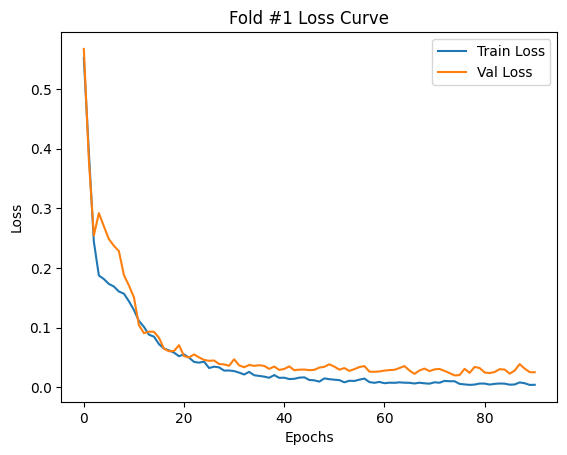

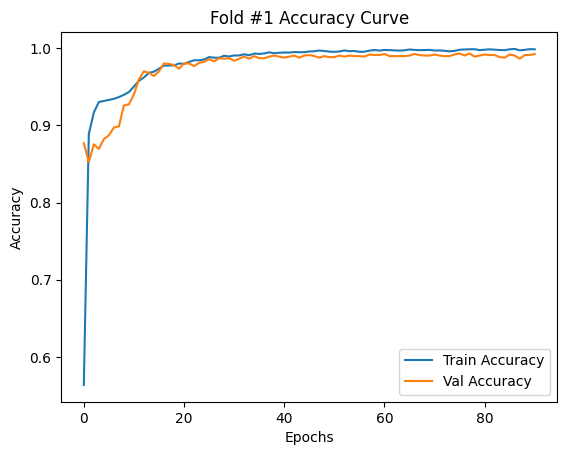

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
# 1 fold validation set accuracy: 0.992517006802721
# 1 fold validation set sensitivity: 0.9959893048128342
# 1 fold validation set specificity: 0.9889196675900277
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 1 fold test set accuracy: 0.9817391304347826
# 1 fold validation set sensitivity: 0.9484304932735426
# 1 fold validation set specificity: 0.9897518878101402
training # 2 fold...
Epoch 1/200
52/52 - 3s - 59ms/step - accuracy: 0.6251 - loss: 0.5183 - val_accuracy: 0.8701 - val_loss: 0.5171
Epoch 2/200
52/52 - 2s - 34ms/step - accuracy: 0.9176 - loss: 0.3498 - val_accuracy: 0.8088 - val_loss: 0.3888
Epoch 3/200
52/52 - 2s - 34ms/step - accuracy: 0.9248 - loss: 0.2005 - val_accuracy: 0.8490 - val_loss: 0.3426
Epoch 4/200
52/52 - 2s - 34ms/step - accuracy: 0.9305 - loss: 0.1817 - val_accuracy: 0.8476 - val_loss: 0.3470
Epoch 5/200
52/52 - 2s - 31ms/step - accuracy: 0.9329 - loss: 0.1728 - val_accuracy: 0.8633 - v

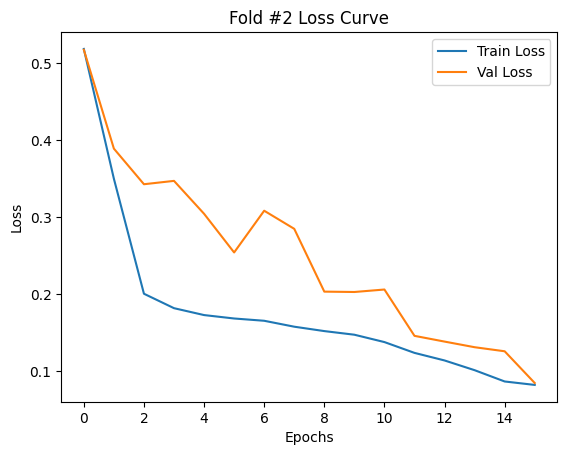

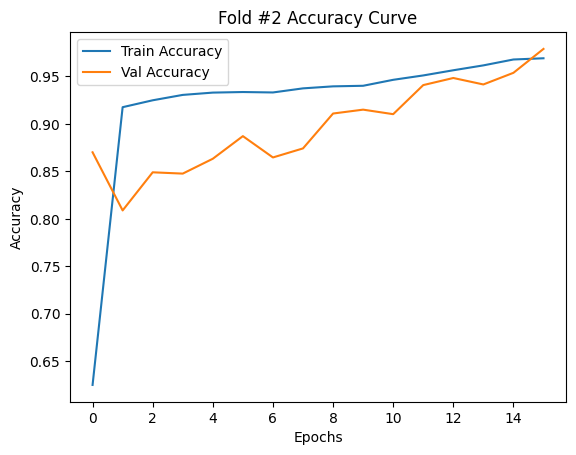

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 2 fold validation set accuracy: 0.9789115646258504
# 2 fold validation set sensitivity: 0.9640883977900553
# 2 fold validation set specificity: 0.9932975871313673
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 2 fold test set accuracy: 0.9773913043478261
# 2 fold validation set sensitivity: 0.9349775784753364
# 2 fold validation set specificity: 0.9875943905070119
training # 3 fold...
Epoch 1/200
52/52 - 4s - 69ms/step - accuracy: 0.7163 - loss: 0.4397 - val_accuracy: 0.8448 - val_loss: 0.3108
Epoch 2/200
52/52 - 2s - 34ms/step - accuracy: 0.9201 - loss: 0.2139 - val_accuracy: 0.8727 - val_loss: 0.2798
Epoch 3/200
52/52 - 2s - 34ms/step - accuracy: 0.9282 - loss: 0.1873 - val_accuracy: 0.8734 - val_loss: 0.3085
Epoch 4/200
52/52 - 2s - 34ms/step - accuracy: 0.9303 - loss: 0.1795 - val_accuracy: 0.8850 - val_loss: 0.2810
Epoch 5/200
52/52 - 2s - 29ms/step - accuracy: 0.9340 - loss: 0.1694 - val_accuracy: 0.9129 - val_loss: 0.2367
Epoch 6/200
52/52 - 2s

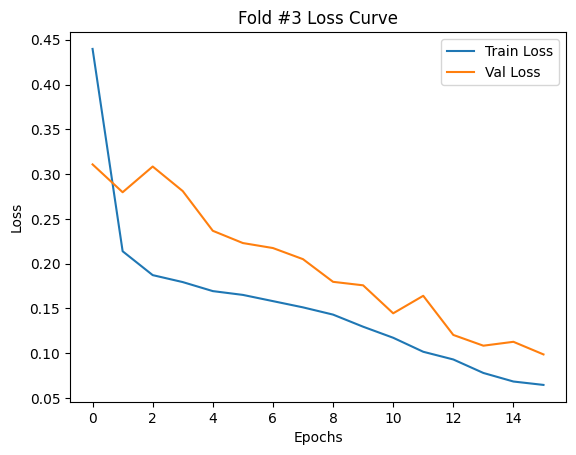

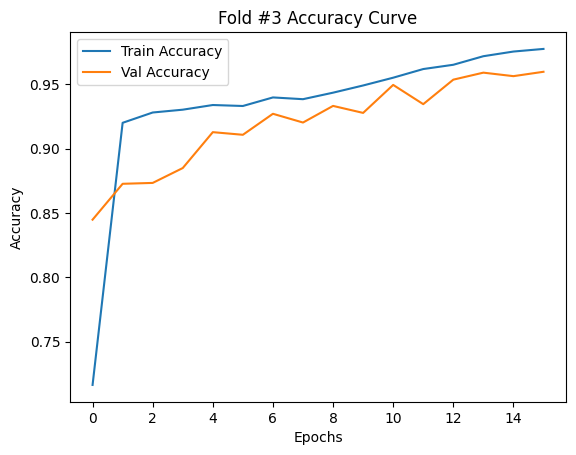

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
# 3 fold validation set accuracy: 0.9598366235534377
# 3 fold validation set sensitivity: 0.9330601092896175
# 3 fold validation set specificity: 0.9864314789687924
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
# 3 fold test set accuracy: 0.9773913043478261
# 3 fold validation set sensitivity: 0.9327354260089686
# 3 fold validation set specificity: 0.9881337648327939
training # 4 fold...
Epoch 1/200
52/52 - 4s - 73ms/step - accuracy: 0.6689 - loss: 0.5026 - val_accuracy: 0.8400 - val_loss: 0.5054
Epoch 2/200
52/52 - 2s - 34ms/step - accuracy: 0.9218 - loss: 0.3634 - val_accuracy: 0.8046 - val_loss: 0.4388
Epoch 3/200
52/52 - 2s - 34ms/step - accuracy: 0.9248 - loss: 0.2861 - val_accuracy: 0.8074 - val_loss: 0.4097
Epoch 4/200
52/52 - 2s - 33ms/step - accuracy: 0.9263 - loss: 0.2384 - val_accuracy: 0.8033 - val_loss: 0.4151
Epoch 5/200
52/52 - 1s - 26ms/step - accuracy: 0.9296 - loss: 0.2095 - val_accuracy: 0.8189 - val_loss: 0.3906
Epoch 6/200
52/52 - 1

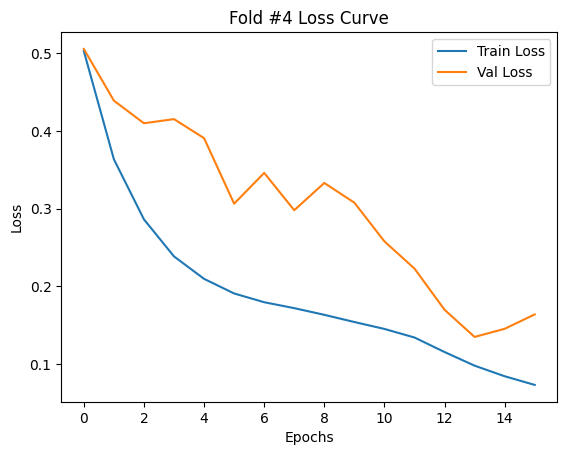

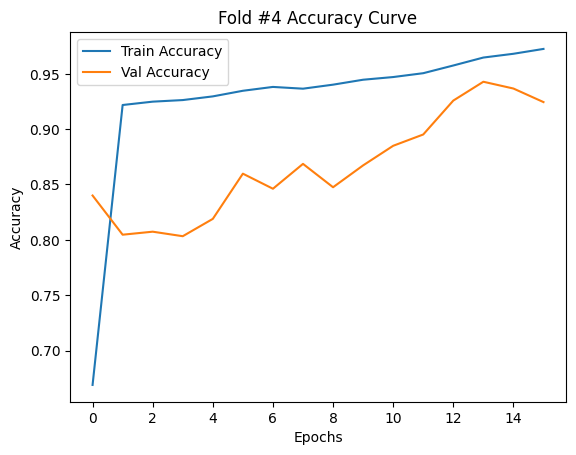

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
# 4 fold validation set accuracy: 0.9244383934649422
# 4 fold validation set sensitivity: 0.8616187989556136
# 4 fold validation set specificity: 0.9928876244665719
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 4 fold test set accuracy: 0.9691304347826087
# 4 fold validation set sensitivity: 0.8609865470852018
# 4 fold validation set specificity: 0.9951456310679612
training # 5 fold...
Epoch 1/200
52/52 - 4s - 76ms/step - accuracy: 0.6385 - loss: 0.5095 - val_accuracy: 0.8244 - val_loss: 0.5297
Epoch 2/200
52/52 - 2s - 38ms/step - accuracy: 0.9208 - loss: 0.3706 - val_accuracy: 0.7883 - val_loss: 0.4671
Epoch 3/200
52/52 - 2s - 34ms/step - accuracy: 0.9217 - loss: 0.2474 - val_accuracy: 0.8060 - val_loss: 0.3968
Epoch 4/200
52/52 - 2s - 35ms/step - accuracy: 0.9260 - loss: 0.1908 - val_accuracy: 0.8564 - val_loss: 0.3151
Epoch 5/200
52/52 - 1s - 28ms/step - accuracy: 0.9332 - loss: 0.1790 - val_accuracy: 0.8468 - val_loss: 0.3607
Epoch 6/200
52/52 - 1s

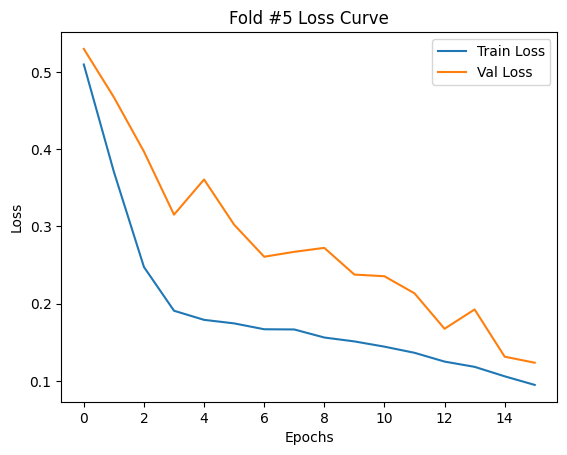

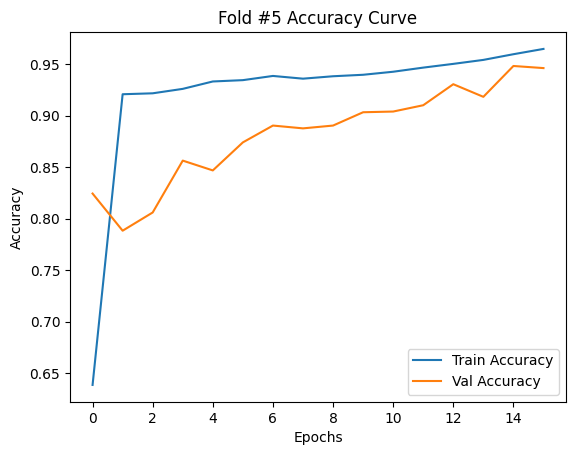

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 5 fold validation set accuracy: 0.9462219196732471
# 5 fold validation set sensitivity: 0.9138627187079408
# 5 fold validation set specificity: 0.9793388429752066
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 5 fold test set accuracy: 0.9795652173913043
# 5 fold validation set sensitivity: 0.9282511210762332
# 5 fold validation set specificity: 0.9919093851132686
training # 6 fold...
Epoch 1/200
52/52 - 3s - 65ms/step - accuracy: 0.6371 - loss: 0.5169 - val_accuracy: 0.8625 - val_loss: 0.5473
Epoch 2/200
52/52 - 2s - 43ms/step - accuracy: 0.9144 - loss: 0.3825 - val_accuracy: 0.8393 - val_loss: 0.4241
Epoch 3/200
52/52 - 2s - 35ms/step - accuracy: 0.9216 - loss: 0.2996 - val_accuracy: 0.8216 - val_loss: 0.3915
Epoch 4/200
52/52 - 2s - 41ms/step - accuracy: 0.9233 - loss: 0.2463 - val_accuracy: 0.8373 - val_loss: 0.3580
Epoch 5/200
52/52 - 2s - 35ms/step - accuracy: 0.9276 - loss: 0.2177 - val_accuracy: 0.8502 - val_loss: 0.3339
Epoch 6/200
52/52 - 2s

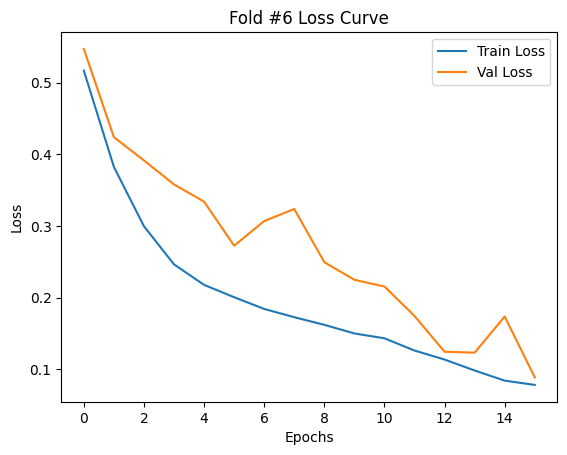

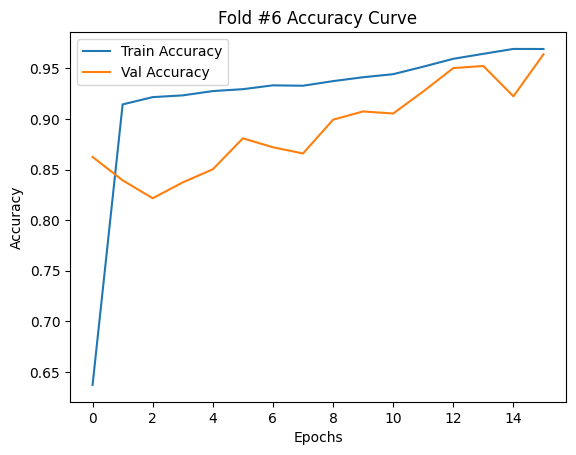

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 6 fold validation set accuracy: 0.9639210347174949
# 6 fold validation set sensitivity: 0.9393103448275862
# 6 fold validation set specificity: 0.9879032258064516
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 6 fold test set accuracy: 0.9786956521739131
# 6 fold validation set sensitivity: 0.9304932735426009
# 6 fold validation set specificity: 0.9902912621359223
training # 7 fold...
Epoch 1/200
52/52 - 6s - 113ms/step - accuracy: 0.6899 - loss: 0.4674 - val_accuracy: 0.8074 - val_loss: 0.3872
Epoch 2/200
52/52 - 4s - 85ms/step - accuracy: 0.9189 - loss: 0.2229 - val_accuracy: 0.8203 - val_loss: 0.3673
Epoch 3/200
52/52 - 4s - 69ms/step - accuracy: 0.9243 - loss: 0.1959 - val_accuracy: 0.8584 - val_loss: 0.3030
Epoch 4/200
52/52 - 2s - 42ms/step - accuracy: 0.9297 - loss: 0.1840 - val_accuracy: 0.8468 - val_loss: 0.3272
Epoch 5/200
52/52 - 2s - 45ms/step - accuracy: 0.9310 - loss: 0.1791 - val_accuracy: 0.8795 - val_loss: 0.2779
Epoch 6/200
52/52 - 2

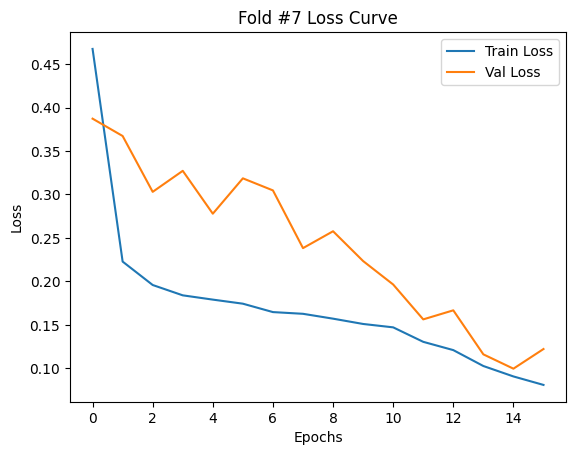

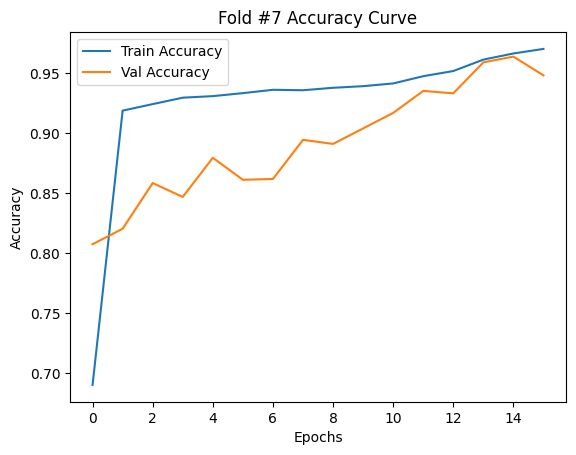

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 7 fold validation set accuracy: 0.9482641252552757
# 7 fold validation set sensitivity: 0.9116094986807388
# 7 fold validation set specificity: 0.9873417721518988
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 7 fold test set accuracy: 0.9760869565217392
# 7 fold validation set sensitivity: 0.9013452914798207
# 7 fold validation set specificity: 0.994066882416397
training # 8 fold...
Epoch 1/200
52/52 - 3s - 65ms/step - accuracy: 0.6896 - loss: 0.4850 - val_accuracy: 0.8598 - val_loss: 0.4652
Epoch 2/200
52/52 - 2s - 34ms/step - accuracy: 0.9176 - loss: 0.2470 - val_accuracy: 0.8829 - val_loss: 0.2574
Epoch 3/200
52/52 - 2s - 33ms/step - accuracy: 0.9276 - loss: 0.1897 - val_accuracy: 0.8931 - val_loss: 0.2602
Epoch 4/200
52/52 - 2s - 34ms/step - accuracy: 0.9281 - loss: 0.1831 - val_accuracy: 0.8972 - val_loss: 0.2544
Epoch 5/200
52/52 - 2s - 34ms/step - accuracy: 0.9322 - loss: 0.1731 - val_accuracy: 0.8979 - val_loss: 0.2558
Epoch 6/200
52/52 - 2s 

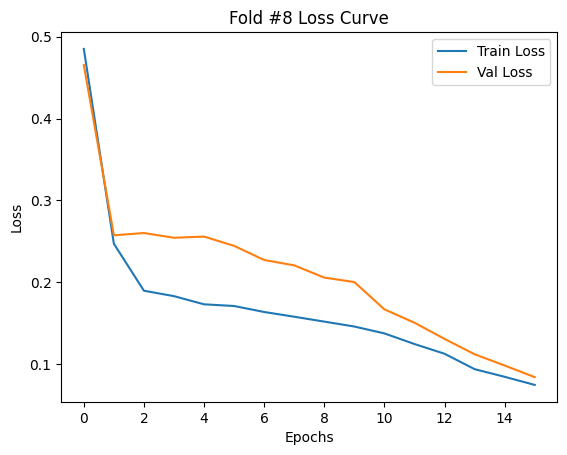

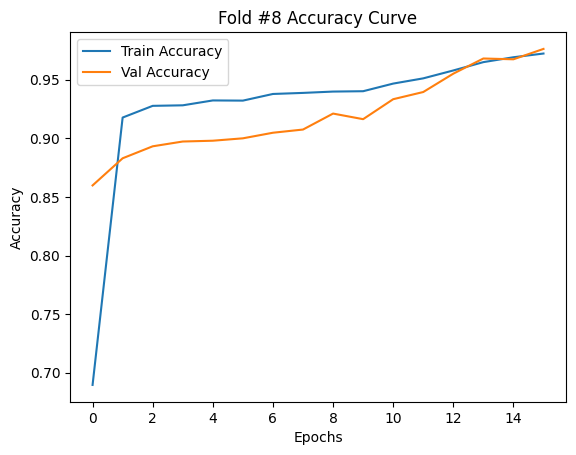

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 8 fold validation set accuracy: 0.9761742682096665
# 8 fold validation set sensitivity: 0.9701704545454546
# 8 fold validation set specificity: 0.9816993464052287
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 8 fold test set accuracy: 0.9791304347826087
# 8 fold validation set sensitivity: 0.9551569506726457
# 8 fold validation set specificity: 0.9848975188781014
training # 9 fold...
Epoch 1/200
52/52 - 4s - 68ms/step - accuracy: 0.6126 - loss: 0.5217 - val_accuracy: 0.8319 - val_loss: 0.5421
Epoch 2/200
52/52 - 2s - 36ms/step - accuracy: 0.9100 - loss: 0.3500 - val_accuracy: 0.8523 - val_loss: 0.2902
Epoch 3/200
52/52 - 1s - 29ms/step - accuracy: 0.9220 - loss: 0.2063 - val_accuracy: 0.8509 - val_loss: 0.3154
Epoch 4/200
52/52 - 1s - 28ms/step - accuracy: 0.9274 - loss: 0.1867 - val_accuracy: 0.8645 - val_loss: 0.2953
Epoch 5/200
52/52 - 2s - 31ms/step - accuracy: 0.9314 - loss: 0.1787 - val_accuracy: 0.8809 - val_loss: 0.2737
Epoch 6/200
52/52 - 2s

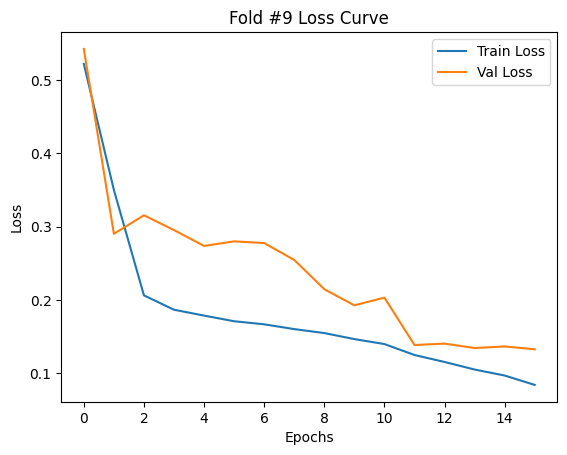

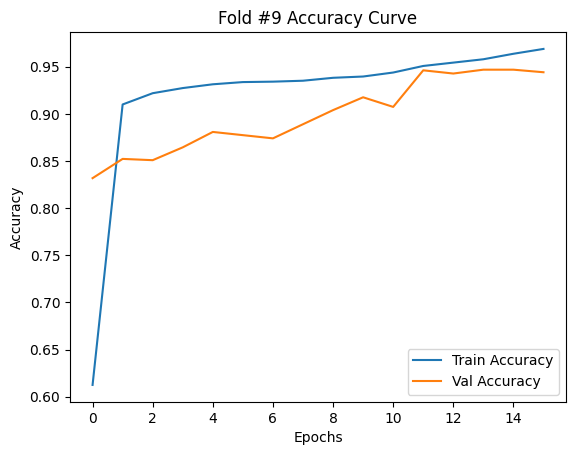

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 9 fold validation set accuracy: 0.9441797140912185
# 9 fold validation set sensitivity: 0.8902606310013718
# 9 fold validation set specificity: 0.9972972972972973
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
# 9 fold test set accuracy: 0.9773913043478261
# 9 fold validation set sensitivity: 0.9080717488789237
# 9 fold validation set specificity: 0.994066882416397
training # 10 fold...
Epoch 1/200
52/52 - 3s - 54ms/step - accuracy: 0.6684 - loss: 0.4970 - val_accuracy: 0.8203 - val_loss: 0.5317
Epoch 2/200
52/52 - 1s - 28ms/step - accuracy: 0.9237 - loss: 0.3631 - val_accuracy: 0.8094 - val_loss: 0.4378
Epoch 3/200
52/52 - 1s - 28ms/step - accuracy: 0.9238 - loss: 0.2909 - val_accuracy: 0.8053 - val_loss: 0.4085
Epoch 4/200
52/52 - 1s - 28ms/step - accuracy: 0.9263 - loss: 0.2414 - val_accuracy: 0.8237 - val_loss: 0.3758
Epoch 5/200
52/52 - 1s - 28ms/step - accuracy: 0.9304 - loss: 0.2079 - val_accuracy: 0.8285 - val_loss: 0.3778
Epoch 6/200
52/52 - 1s

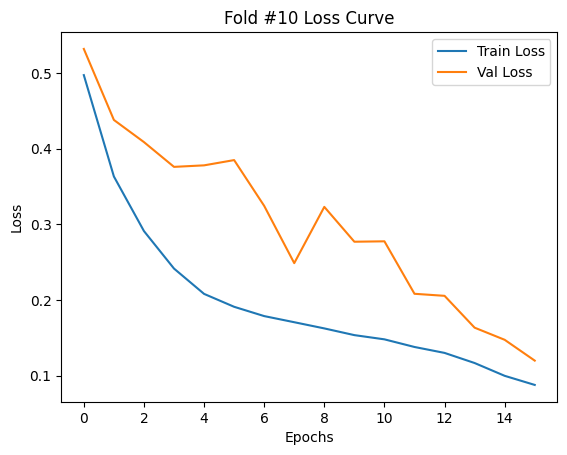

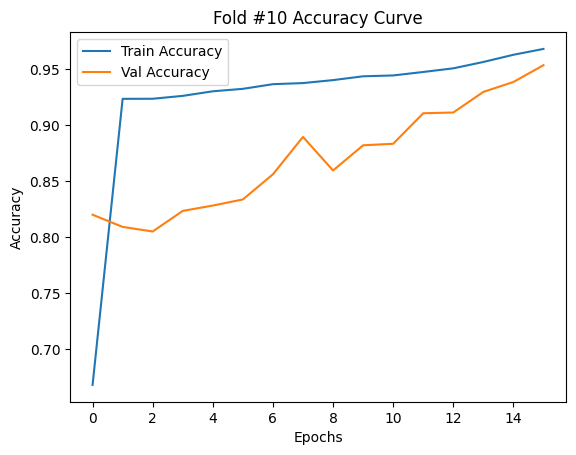

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
# 10 fold validation set accuracy: 0.953710006807352
# 10 fold validation set sensitivity: 0.9135285913528591
# 10 fold validation set specificity: 0.9920212765957447
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
# 10 fold test set accuracy: 0.9765217391304348
# 10 fold validation set sensitivity: 0.905829596412556
# 10 fold validation set specificity: 0.9935275080906149


In [18]:
for fold, (train_index, val_index) in enumerate(kf.split(x_train_resampled)):
    print(f'training # {fold + 1} fold...')
    X_train, X_val = x_train_resampled[train_index], x_train_resampled[val_index]
    y_train, y_val = y_train_resampled[train_index], y_train_resampled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    model = create_model()
    history = model.fit(X_train, y_train, epochs=200, batch_size=256, verbose=2,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

    ## Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold #{fold + 1} Loss Curve')
    plt.legend()
    plt.show()

    ## Plot training and validation accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold #{fold + 1} Accuracy Curve')
    plt.legend()
    plt.show()

    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
    val_score = accuracy_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    tn_val, fp_val, fn_val, tp_val = confusion_matrix(y_val, y_val_pred).ravel()
    val_specificity = tn_val / (tn_val + fp_val) if (tn_val + fp_val) > 0 else 0

    val_scores.append(val_score)
    val_recalls.append(val_recall)
    val_specificities.append(val_specificity)

    print(f'# {fold + 1} fold validation set accuracy: {val_score}')
    print(f'# {fold + 1} fold validation set sensitivity: {val_recall}')
    print(f'# {fold + 1} fold validation set specificity: {val_specificity}')

    if val_recall > best_val_recall:
        best_val_recall = val_recall
        best_model = model
        y_best_model_test_pred = (model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1))) > 0.5).astype(
            "int32")
        best_model_test_score = accuracy_score(y_test, y_best_model_test_pred)
        best_model_test_recall = recall_score(y_test, y_best_model_test_pred)
        tn_best, fp_best, fn_best, tp_best = confusion_matrix(y_test, y_best_model_test_pred).ravel()
        best_model_test_specificity = tn_best / (tn_best + fp_best) if (tn_best + fp_best) > 0 else 0
        best_model_test_results = (best_model_test_score, best_model_test_recall, best_model_test_specificity)


    y_test_pred = (model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1], 1))) > 0.5).astype("int32")

    test_score = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()
    test_specificity = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

    test_scores.append(test_score)
    test_recalls.append(test_recall)
    test_specificities.append(test_specificity)

    print(f'# {fold + 1} fold test set accuracy: {test_score}')
    print(f'# {fold + 1} fold validation set sensitivity: {test_recall}')
    print(f'# {fold + 1} fold validation set specificity: {test_specificity}')

In [19]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 174, 20)        │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 170, 20)        │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 170, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 166, 20)        │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 166, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 83, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1660)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        83,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,785 (1022.60 KB)

 Trainable params: 87,261 (340.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 174,524 (681.74 KB)

In [20]:
average_val_score = np.mean(val_scores)
average_val_recall = np.mean(val_recalls)
average_val_specificity = np.mean(val_specificities)
average_test_score = np.mean(test_scores)
average_test_recall = np.mean(test_recalls)
average_test_specificity = np.mean(test_specificities)

In [21]:
print(f'average accuracy of validation set: {average_val_score}')
print(f'average sensitivity of validation set: {average_val_recall}')
print(f'average specificity of validation set: {average_val_specificity}')
print(f'average accuracy of test set: {average_test_score}')
print(f'average sensitivity of test set: {average_test_recall}')
print(f'average specificity of test set: {average_test_specificity}')

average accuracy of validation set: 0.9588174657201206
average sensitivity of validation set: 0.9293498849964072
average specificity of validation set: 0.9887138119388587
average accuracy of test set: 0.977304347826087
average sensitivity of test set: 0.9206278026905828
average specificity of test set: 0.990938511326861


In [22]:

print(f'Validation accuracy of each fold: {val_scores}')
print(f'Validation sensitivity of each fold: {val_recalls}')
print(f'Validation specificity of each fold: {val_specificities}')
print(f'Test accuracy of each fold: {test_scores}')
print(f'Test sensitivity of each fold: {test_recalls}')
print(f'Test specificity of each fold: {test_specificities}')

Validation accuracy of each fold: [0.992517006802721, 0.9789115646258504, 0.9598366235534377, 0.9244383934649422, 0.9462219196732471, 0.9639210347174949, 0.9482641252552757, 0.9761742682096665, 0.9441797140912185, 0.953710006807352]
Validation sensitivity of each fold: [0.9959893048128342, 0.9640883977900553, 0.9330601092896175, 0.8616187989556136, 0.9138627187079408, 0.9393103448275862, 0.9116094986807388, 0.9701704545454546, 0.8902606310013718, 0.9135285913528591]
Validation specificity of each fold: [0.9889196675900277, 0.9932975871313673, 0.9864314789687924, 0.9928876244665719, 0.9793388429752066, 0.9879032258064516, 0.9873417721518988, 0.9816993464052287, 0.9972972972972973, 0.9920212765957447]
Test accuracy of each fold: [0.9817391304347826, 0.9773913043478261, 0.9773913043478261, 0.9691304347826087, 0.9795652173913043, 0.9786956521739131, 0.9760869565217392, 0.9791304347826087, 0.9773913043478261, 0.9765217391304348]
Test sensitivity of each fold: [0.9484304932735426, 0.93497757

In [23]:
if best_model_test_results:
    print(f'Best model accuracy on the test set: {best_model_test_results[0]}')
    print(f'Best model sensitivity on the test set: {best_model_test_results[1]}')
    print(f'Best model specificity on the test set: {best_model_test_results[2]}')

Best model accuracy on the test set: 0.9817391304347826
Best model sensitivity on the test set: 0.9484304932735426
Best model specificity on the test set: 0.9897518878101402


In [1]:
import tensorflow as tf

In [ ]:
best_model.save('best_model.keras')

In [2]:
best_model = tf.keras.models.load_model('best_model.keras')

c:\Users\Shuvadipta Biswas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<h1>Applying model on Sienna Scalp Data (McEEG)</h1>

<h1>PN00-1</h1>

In [3]:
import numpy as np
import pandas as pd

from mne.io import RawArray, read_raw_edf
import mne

from sklearn.preprocessing import StandardScaler

from scipy import signal

import warnings
warnings.filterwarnings("ignore")     
import matplotlib.pyplot as plt
import random

In [4]:
path1 = 'PN00/PN00-1.edf'
raw = read_raw_edf(path1)

raw.load_data()

Extracting EDF parameters from c:\Users\Shuvadipta Biswas\Desktop\DEMO_CAPSTONE\PN00\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


<RawEDF | PN00-1.edf, 35 x 1344000 (2625.0 s), ~358.9 MiB, data loaded>

In [5]:
np.random.seed(1)

raw = raw.filter(0.53, 50., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.53 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.53
- Lower transition bandwidth: 0.53 Hz (-6 dB cutoff frequency: 0.27 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3189 samples (6.229 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.8s finished


In [6]:
import pywt

In [7]:
def denoise_signal(signal, wavelet='db1', level=1):
    # Perform Discrete Wavelet Transform (DWT)
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Set threshold value for coefficients
    threshold = 0.2 * np.max(np.abs(coeffs[-level]))

    # Threshold the coefficients
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

    # Perform Inverse Discrete Wavelet Transform (IDWT)
    denoised_signal = pywt.waverec(coeffs, wavelet)

    return denoised_signal

In [8]:
denoised_data = np.array([denoise_signal(raw.get_data(picks=ch)[0]) for ch in range(len(raw.info['ch_names']))])

In [9]:
raw_denoised = raw.copy()
raw_denoised._data = denoised_data

In [10]:
raw = raw_denoised

In [11]:

#
raw3 = raw.copy().crop(tmin=1143, tmax=1213)
raw3= raw3.to_data_frame()

channels_to_keep = ["EEG Fp1", "EEG Fp2", "EEG F3", "EEG F4", "EEG C3", "EEG C4", "EEG P3", "EEG P4", "EEG O1", "EEG O2", 
                    "EEG F7", "EEG F8", "EEG T3", "EEG T4", "EEG T5", "EEG T6", "EEG Fz", "EEG Cz", "EEG Pz"]
# Select only the required channels
raw3 = raw3[channels_to_keep]
print(raw3.shape)


(35841, 19)


<Axes: >

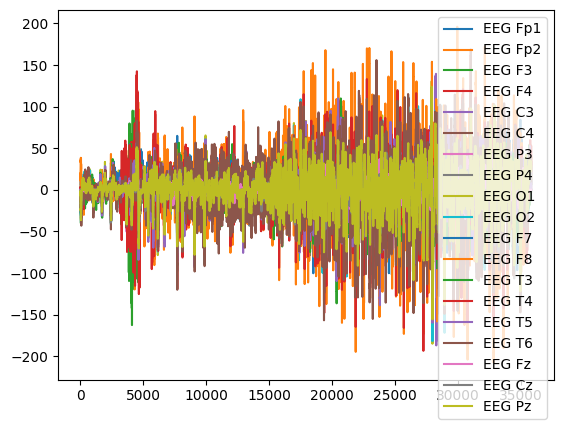

In [12]:
raw3.plot()

In [13]:
print(raw3)

        EEG Fp1  EEG Fp2    EEG F3  EEG F4     EEG C3     EEG C4     EEG P3  \
0      0.000000      0.0  0.000000     0.0   0.000000  -2.214638   0.000000   
1      0.000000      0.0  0.000000     0.0   0.000000  -2.214638   0.000000   
2      0.000000      0.0  0.000000     0.0   0.000000   0.000000   0.000000   
3      0.000000      0.0  0.000000     0.0   0.000000   0.000000   0.000000   
4      0.000000      0.0  0.000000     0.0   0.000000   2.280609   0.000000   
...         ...      ...       ...     ...        ...        ...        ...   
35836 -6.994806      0.0 -2.442329     0.0  10.129841  20.972159  22.541506   
35837 -6.994806      0.0 -2.442329     0.0  10.129841  20.972159  22.541506   
35838 -7.296836      0.0 -0.673476     0.0   7.241953  26.847579  21.737464   
35839 -7.296836      0.0 -0.673476     0.0   7.241953  26.847579  21.737464   
35840 -8.145419      0.0 -0.881942     0.0   5.081517  32.701540  20.323476   

          EEG P4     EEG O1     EEG O2     EEG F7  

In [14]:
#1_Fp1
data1=raw3.iloc[0:512*70, 0]
print(data1.shape)
#print(data)
arr= data1.to_numpy()
df_split = np.array_split(arr, 70)

new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)
print(new_raw.shape)
print(new_raw)
new_raw=pd.DataFrame(new_raw)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
print(normalized_array_x_data)
x_data=normalized_array_x_data
data1= pd.DataFrame(x_data)
data1.to_csv('PN00/PN00-1/Singledata\\1_Fp1.csv')

(35840,)
(70, 178)
[[-6.30342948e-03  6.20603588e-03 -6.11120193e-03 ...  6.58894525e-03
  -6.49642453e-03  6.40081931e-03]
 [ 6.37723817e-01 -1.55195529e-01  8.90248069e-02 ...  9.27688767e-01
   3.01632700e+00  2.63195628e+00]
 [ 1.65491464e+00  3.67211159e+00  4.02374817e+00 ... -6.78063195e-02
   9.94729744e-02 -1.85270978e-01]
 ...
 [ 1.38570686e+00 -3.57782216e-01  2.02262182e-01 ...  1.25983218e-01
   7.95859944e-01  3.51916259e+00]
 [-4.76788980e-01  3.01308654e+00 -4.39856343e-01 ... -1.17622241e+01
  -1.27586613e+01 -1.35034035e+01]
 [-7.68526378e+00 -9.23040856e+00 -1.41227825e+01 ... -5.70078822e+00
  -6.82458261e+00 -7.09113161e+00]]
         0         1         2         3         4         5         6    \
0  -0.144775 -0.111865 -0.083943 -0.093367 -0.157364 -0.163448 -0.156509   
1  -0.056044 -0.126956 -0.074397 -0.099648 -0.151974 -0.168054 -0.152361   
2   0.084100  0.230907  0.320425  0.364790  0.479499  0.523190  0.558361   
3  -0.143916 -0.112444 -0.083325 -0.09391

In [16]:
#2_Fp2
data2=raw3.iloc[0:512*70, 1]
#print(data)
arr= data2.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data

data2= pd.DataFrame(x_data)
data2.to_csv('PN00/PN00-1/Singledata\\2_Fp2.csv')


#3_F3
data3=raw3.iloc[0:512*70, 2]
#print(data)
arr= data3.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data3= pd.DataFrame(x_data)
data3.to_csv('PN00/PN00-1/Singledata\\3_F3.csv')


#4_F4
data4=raw3.iloc[0:512*70, 3]
#print(data)
arr= data4.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data4= pd.DataFrame(x_data)
data4.to_csv('PN00/PN00-1/Singledata\\4_F4.csv')


#5_C3
data5=raw3.iloc[0:512*70, 4]
#print(data)
arr= data5.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data5= pd.DataFrame(x_data)
data5.to_csv('PN00/PN00-1/Singledata\\5_C3.csv')


#6_C4
data6=raw3.iloc[0:512*70, 5]
#print(data)
arr= data6.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data6= pd.DataFrame(x_data)
data6.to_csv('PN00/PN00-1/Singledata\\6_C4.csv')


#7_P3
data7=raw3.iloc[0:512*70, 6]
#print(data)
arr= data7.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data7= pd.DataFrame(x_data)
data7.to_csv('PN00/PN00-1/Singledata\\7_P3.csv')


#8_P4
data8=raw3.iloc[0:512*70, 7]
#print(data)
arr= data8.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data8= pd.DataFrame(x_data)
data8.to_csv('PN00/PN00-1/Singledata\\8_P4.csv')


#9_O1
data9=raw3.iloc[0:512*70, 8]
#print(data)
arr= data9.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data9= pd.DataFrame(x_data)
data9.to_csv('PN00/PN00-1/Singledata\\9_O1.csv')


#10_O2
data10=raw3.iloc[0:512*70, 9]
#print(data)
arr= data10.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data10= pd.DataFrame(x_data)
data10.to_csv('PN00/PN00-1/Singledata\\10_O2.csv')


#11_F7
data11=raw3.iloc[0:512*70, 10]
#print(data)
arr= data11.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data11= pd.DataFrame(x_data)
data11.to_csv('PN00/PN00-1/Singledata\\11_F7.csv')


#12_F8
data12=raw3.iloc[0:512*70, 11]
#print(data)
arr= data12.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data12= pd.DataFrame(x_data)
data12.to_csv('PN00/PN00-1/Singledata\\12_F8.csv')


#13_T3
data13=raw3.iloc[0:512*70, 12]
#print(data)
arr= data13.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data13= pd.DataFrame(x_data)
data13.to_csv('PN00/PN00-1/Singledata\\13_T3.csv')


#14_T4
data14=raw3.iloc[0:512*70, 13]
#print(data)
arr= data14.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data14= pd.DataFrame(x_data)
data14.to_csv('PN00/PN00-1/Singledata\\14_T4.csv')


#15_T5
data15=raw3.iloc[0:512*70, 14]
#print(data)
arr= data15.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data15= pd.DataFrame(x_data)
data15.to_csv('PN00/PN00-1/Singledata\\15_T5.csv')


#16_T6
data16=raw3.iloc[0:512*70, 15]
#print(data)
arr= data16.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data16= pd.DataFrame(x_data)
data16.to_csv('PN00/PN00-1/Singledata\\16_T6.csv')


#17_Fz
data17=raw3.iloc[0:512*70, 16]
#print(data)
arr= data17.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data17= pd.DataFrame(x_data)
data17.to_csv('PN00/PN00-1/Singledata\\17_Fz.csv')


#18_Cz
data18=raw3.iloc[0:512*70, 17]
#print(data)
arr= data18.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data18= pd.DataFrame(x_data)
data18.to_csv('PN00/PN00-1/Singledata\\18_Cz.csv')


#19_Pz
data19=raw3.iloc[0:512*70, 18]
#print(data)
arr= data19.to_numpy()
df_split = np.array_split(arr, 70)
#
new_raw = np.apply_along_axis(lambda x: signal.resample(x, 178), axis=1, arr=df_split)

scaler = StandardScaler()
normalized_array_x_data = scaler.fit_transform(new_raw)
normalized_array_x_data= pd.DataFrame(normalized_array_x_data)
normalized_df_x_data = pd.DataFrame(normalized_array_x_data, columns=normalized_array_x_data.columns)
x_data=normalized_array_x_data
data19= pd.DataFrame(x_data)
data19.to_csv('PN00/PN00-1/Singledata\\19_Pz.csv')

<h3>Predictions on Individual Channels</h3>

In [17]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.src.saving.saving_api import load_model

from mne.io import RawArray, read_raw_edf
import mne

from sklearn.preprocessing import StandardScaler

from scipy import signal

import warnings


warnings.filterwarnings("ignore") 

In [18]:
model = best_model

In [19]:
# Load test data
data_1_Fp1 = 'PN00/PN00-1/Singledata\\1_Fp1.csv'
x_test_1_Fp1 = pd.read_csv(data_1_Fp1, header=0, index_col=0)

# Reshape for model prediction
x_test_1_Fp1 = x_test_1_Fp1.values  # Convert DataFrame to NumPy array
x_test_1_Fp1 = x_test_1_Fp1.reshape((x_test_1_Fp1.shape[0], x_test_1_Fp1.shape[1], 1))

# Predict
y_pred = model.predict(x_test_1_Fp1)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "1"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_1_Fp1 = pd.DataFrame(y_pred, index=pd.read_csv(data_1_Fp1, header=0, index_col=0).index)
data_1_Fp1.to_csv('PN00/PN00-1/Resultdata\\r1_Fp1.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0]
21


In [20]:
# Load test data
data_2_Fp2 = 'PN00/PN00-1/Singledata\\2_Fp2.csv'
x_test_2_Fp2 = pd.read_csv(data_2_Fp2, header=0, index_col=0)

# Reshape for model prediction
x_test_2_Fp2 = x_test_2_Fp2.values  # Convert DataFrame to NumPy array
x_test_2_Fp2 = x_test_2_Fp2.reshape((x_test_2_Fp2.shape[0], x_test_2_Fp2.shape[1], 1))

# Predict
y_pred = model.predict(x_test_2_Fp2)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "2"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_2_Fp2 = pd.DataFrame(y_pred, index=pd.read_csv(data_2_Fp2, header=0, index_col=0).index)
data_2_Fp2.to_csv('PN00/PN00-1/Resultdata\\r2_Fp2.csv')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0]
21


In [21]:
# Load test data
data_3_F3 = 'PN00/PN00-1/Singledata\\3_F3.csv'
x_test_3_F3 = pd.read_csv(data_3_F3, header=0, index_col=0)

# Reshape for model prediction
x_test_3_F3 = x_test_3_F3.values  # Convert DataFrame to NumPy array
x_test_3_F3 = x_test_3_F3.reshape((x_test_3_F3.shape[0], x_test_3_F3.shape[1], 1))

# Predict
y_pred = model.predict(x_test_3_F3)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "3"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_3_F3 = pd.DataFrame(y_pred, index=pd.read_csv(data_3_F3, header=0, index_col=0).index)
data_3_F3.to_csv('PN00/PN00-1/Resultdata\\r3_F3.csv')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0]
33


In [22]:
# Load test data
data_4_F4 = 'PN00/PN00-1/Singledata\\4_F4.csv'
x_test_4_F4 = pd.read_csv(data_4_F4, header=0, index_col=0)

# Reshape for model prediction
x_test_4_F4 = x_test_4_F4.values  # Convert DataFrame to NumPy array
x_test_4_F4 = x_test_4_F4.reshape((x_test_4_F4.shape[0], x_test_4_F4.shape[1], 1))

# Predict
y_pred = model.predict(x_test_4_F4)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "4"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_4_F4 = pd.DataFrame(y_pred, index=pd.read_csv(data_4_F4, header=0, index_col=0).index)
data_4_F4.to_csv('PN00/PN00-1/Resultdata\\r4_F4.csv')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0]
31


In [23]:
# Load test data
data_5_C3 = 'PN00/PN00-1/Singledata\\5_C3.csv'
x_test_5_C3 = pd.read_csv(data_5_C3, header=0, index_col=0)

# Reshape for model prediction
x_test_5_C3 = x_test_5_C3.values  # Convert DataFrame to NumPy array
x_test_5_C3 = x_test_5_C3.reshape((x_test_5_C3.shape[0], x_test_5_C3.shape[1], 1))

# Predict
y_pred = model.predict(x_test_5_C3)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_5_C3 = pd.DataFrame(y_pred, index=pd.read_csv(data_5_C3, header=0, index_col=0).index)
data_5_C3.to_csv('PN00/PN00-1/Resultdata\\r5_C3.csv')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0]
21


In [24]:
# Load test data
data_6_C4 = 'PN00/PN00-1/Singledata\\6_C4.csv'
x_test_6_C4 = pd.read_csv(data_6_C4, header=0, index_col=0)

# Reshape for model prediction
x_test_6_C4 = x_test_6_C4.values  # Convert DataFrame to NumPy array
x_test_6_C4 = x_test_6_C4.reshape((x_test_6_C4.shape[0], x_test_6_C4.shape[1], 1))

# Predict
y_pred = model.predict(x_test_6_C4)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())  # Flatten for readability
print(cou)

# Save results
data_6_C4 = pd.DataFrame(y_pred, index=pd.read_csv(data_6_C4, header=0, index_col=0).index)
data_6_C4.to_csv('PN00/PN00-1/Resultdata\\r6_C4.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
37


In [25]:
# Load test data
data_7_P3 = 'PN00/PN00-1/Singledata\\7_P3.csv'
x_test_7_P3 = pd.read_csv(data_7_P3, header=0, index_col=0)

# Reshape for model prediction
x_test_7_P3 = x_test_7_P3.values  
x_test_7_P3 = x_test_7_P3.reshape((x_test_7_P3.shape[0], x_test_7_P3.shape[1], 1))

# Predict
y_pred = model.predict(x_test_7_P3)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_7_P3 = pd.DataFrame(y_pred, index=pd.read_csv(data_7_P3, header=0, index_col=0).index)
data_7_P3.to_csv('PN00/PN00-1/Resultdata\\r7_P3.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0]
27


In [26]:
# Load test data
data_8_P4 = 'PN00/PN00-1/Singledata\\8_P4.csv'
x_test_8_P4 = pd.read_csv(data_8_P4, header=0, index_col=0)

# Reshape for model prediction
x_test_8_P4 = x_test_8_P4.values  
x_test_8_P4 = x_test_8_P4.reshape((x_test_8_P4.shape[0], x_test_8_P4.shape[1], 1))

# Predict
y_pred = model.predict(x_test_8_P4)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_8_P4 = pd.DataFrame(y_pred, index=pd.read_csv(data_8_P4, header=0, index_col=0).index)
data_8_P4.to_csv('PN00/PN00-1/Resultdata\\r8_P4.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0]
42


In [27]:
# Load test data
data_9_O1 = 'PN00/PN00-1/Singledata\\9_O1.csv'
x_test_9_O1 = pd.read_csv(data_9_O1, header=0, index_col=0)

# Reshape for model prediction
x_test_9_O1 = x_test_9_O1.values  
x_test_9_O1 = x_test_9_O1.reshape((x_test_9_O1.shape[0], x_test_9_O1.shape[1], 1))

# Predict
y_pred = model.predict(x_test_9_O1)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_9_O1 = pd.DataFrame(y_pred, index=pd.read_csv(data_9_O1, header=0, index_col=0).index)
data_9_O1.to_csv('PN00/PN00-1/Resultdata\\r9_O1.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0]
33


In [28]:
# Load test data
data_10_O2 = 'PN00/PN00-1/Singledata\\10_O2.csv'
x_test_10_O2 = pd.read_csv(data_10_O2, header=0, index_col=0)

# Reshape for model prediction
x_test_10_O2 = x_test_10_O2.values  
x_test_10_O2 = x_test_10_O2.reshape((x_test_10_O2.shape[0], x_test_10_O2.shape[1], 1))

# Predict
y_pred = model.predict(x_test_10_O2)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_10_O2 = pd.DataFrame(y_pred, index=pd.read_csv(data_10_O2, header=0, index_col=0).index)
data_10_O2.to_csv('PN00/PN00-1/Resultdata\\r10_O2.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0]
35


In [29]:
# Load test data
data_11_F7 = 'PN00/PN00-1/Singledata\\11_F7.csv'
x_test_11_F7 = pd.read_csv(data_11_F7, header=0, index_col=0)

# Reshape for model prediction
x_test_11_F7 = x_test_11_F7.values  
x_test_11_F7 = x_test_11_F7.reshape((x_test_11_F7.shape[0], x_test_11_F7.shape[1], 1))

# Predict
y_pred = model.predict(x_test_11_F7)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_11_F7 = pd.DataFrame(y_pred, index=pd.read_csv(data_11_F7, header=0, index_col=0).index)
data_11_F7.to_csv('PN00/PN00-1/Resultdata\\r11_F7.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0]
32


In [30]:
# Load test data
data_12_F8 = 'PN00/PN00-1/Singledata\\12_F8.csv'
x_test_12_F8 = pd.read_csv(data_12_F8, header=0, index_col=0)

# Reshape for model prediction
x_test_12_F8 = x_test_12_F8.values  
x_test_12_F8 = x_test_12_F8.reshape((x_test_12_F8.shape[0], x_test_12_F8.shape[1], 1))

# Predict
y_pred = model.predict(x_test_12_F8)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_12_F8 = pd.DataFrame(y_pred, index=pd.read_csv(data_12_F8, header=0, index_col=0).index)
data_12_F8.to_csv('PN00/PN00-1/Resultdata\\r12_F8.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
44


In [31]:
# Load test data
data_13_T3 = 'PN00/PN00-1/Singledata\\13_T3.csv'
x_test_13_T3 = pd.read_csv(data_13_T3, header=0, index_col=0)

# Reshape for model prediction
x_test_13_T3 = x_test_13_T3.values  
x_test_13_T3 = x_test_13_T3.reshape((x_test_13_T3.shape[0], x_test_13_T3.shape[1], 1))

# Predict
y_pred = model.predict(x_test_13_T3)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_13_T3 = pd.DataFrame(y_pred, index=pd.read_csv(data_13_T3, header=0, index_col=0).index)
data_13_T3.to_csv('PN00/PN00-1/Resultdata\\r13_T3.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0]
40


In [32]:
# Load test data
data_14_T4 = 'PN00/PN00-1/Singledata\\14_T4.csv'
x_test_14_T4 = pd.read_csv(data_14_T4, header=0, index_col=0)

# Reshape for model prediction
x_test_14_T4 = x_test_14_T4.values  
x_test_14_T4 = x_test_14_T4.reshape((x_test_14_T4.shape[0], x_test_14_T4.shape[1], 1))

# Predict
y_pred = model.predict(x_test_14_T4)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_14_T4 = pd.DataFrame(y_pred, index=pd.read_csv(data_14_T4, header=0, index_col=0).index)
data_14_T4.to_csv('PN00/PN00-1/Resultdata\\r14_T4.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1]
44


In [33]:
# Load test data
data_15_T5 = 'PN00/PN00-1/Singledata\\15_T5.csv'
x_test_15_T5 = pd.read_csv(data_15_T5, header=0, index_col=0)

# Reshape for model prediction
x_test_15_T5 = x_test_15_T5.values  
x_test_15_T5 = x_test_15_T5.reshape((x_test_15_T5.shape[0], x_test_15_T5.shape[1], 1))

# Predict
y_pred = model.predict(x_test_15_T5)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_15_T5 = pd.DataFrame(y_pred, index=pd.read_csv(data_15_T5, header=0, index_col=0).index)
data_15_T5.to_csv('PN00/PN00-1/Resultdata\\r15_T5.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
31


In [34]:
# Load test data
data_16_T6 = 'PN00/PN00-1/Singledata\\16_T6.csv'
x_test_16_T6 = pd.read_csv(data_16_T6, header=0, index_col=0)

# Reshape for model prediction
x_test_16_T6 = x_test_16_T6.values  
x_test_16_T6 = x_test_16_T6.reshape((x_test_16_T6.shape[0], x_test_16_T6.shape[1], 1))

# Predict
y_pred = model.predict(x_test_16_T6)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_16_T6 = pd.DataFrame(y_pred, index=pd.read_csv(data_16_T6, header=0, index_col=0).index)
data_16_T6.to_csv('PN00/PN00-1/Resultdata\\r16_T6.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0]
40


In [35]:
# Load test data
data_17_Fz = 'PN00/PN00-1/Singledata\\17_Fz.csv'
x_test_17_Fz = pd.read_csv(data_17_Fz, header=0, index_col=0)

# Reshape for model prediction
x_test_17_Fz = x_test_17_Fz.values  
x_test_17_Fz = x_test_17_Fz.reshape((x_test_17_Fz.shape[0], x_test_17_Fz.shape[1], 1))

# Predict
y_pred = model.predict(x_test_17_Fz)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_17_Fz = pd.DataFrame(y_pred, index=pd.read_csv(data_17_Fz, header=0, index_col=0).index)
data_17_Fz.to_csv('PN00/PN00-1/Resultdata\\r17_Fz.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0]
22


In [36]:
# Load test data
data_18_Cz = 'PN00/PN00-1/Singledata\\18_Cz.csv'
x_test_18_Cz = pd.read_csv(data_18_Cz, header=0, index_col=0)

# Reshape for model prediction
x_test_18_Cz = x_test_18_Cz.values  
x_test_18_Cz = x_test_18_Cz.reshape((x_test_18_Cz.shape[0], x_test_18_Cz.shape[1], 1))

# Predict
y_pred = model.predict(x_test_18_Cz)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_18_Cz = pd.DataFrame(y_pred, index=pd.read_csv(data_18_Cz, header=0, index_col=0).index)
data_18_Cz.to_csv('PN00/PN00-1/Resultdata\\r18_Cz.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0]
31


In [37]:
# Load test data
data_19_Pz = 'PN00/PN00-1/Singledata\\19_Pz.csv'
x_test_19_Pz = pd.read_csv(data_19_Pz, header=0, index_col=0)

# Reshape for model prediction
x_test_19_Pz = x_test_19_Pz.values  
x_test_19_Pz = x_test_19_Pz.reshape((x_test_19_Pz.shape[0], x_test_19_Pz.shape[1], 1))

# Predict
y_pred = model.predict(x_test_19_Pz)

# Convert probabilities to binary labels
y_pred = (y_pred > 0.5).astype("int32")

# Count occurrences of "5"
cou = np.sum(y_pred)

# Print results
print(y_pred.flatten())
print(cou)

# Save results
data_19_Pz = pd.DataFrame(y_pred, index=pd.read_csv(data_19_Pz, header=0, index_col=0).index)
data_19_Pz.to_csv('PN00/PN00-1/Resultdata\\r19_Pz.csv')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0]
35


In [38]:
data = np.concatenate((data_1_Fp1,data_2_Fp2,data_3_F3,data_4_F4,data_5_C3,data_6_C4,
                       data_7_P3,data_8_P4,data_9_O1,data_10_O2,data_11_F7,data_12_F8,
                       data_13_T3,data_14_T4,data_15_T5,data_16_T6,
                       data_17_Fz,data_18_Cz,data_19_Pz),
                      axis=0)

In [39]:
data = pd.DataFrame(data)
arr = data.to_numpy()
df_split = np.array_split(arr, 19)
print(df_split)
list_shape = np.array(df_split).shape
print(list_shape)
data_array = np.array(df_split)
data_2d = data_array.reshape(19, -1)
print(data_2d.shape)
data = pd.DataFrame(data_2d)
data=data.T
print(data.shape)
data.to_csv('PN00/PN00-1/Resultdata\\1_Resultdata.csv')

[array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]]), array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
 

<h3>Visualization</h3>

In [40]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt


In [41]:
csv_file = "PN00/PN00-1/Resultdata/1_Resultdata.csv"
df = pd.read_csv(csv_file, index_col=0)  # Remove row index
df.to_csv("PN00/PN00-1/seizure_data_modified.csv", header=False, index=False)

In [42]:
def plot_seizure_activity(csv_file, second):
    # Load CSV file
    df = pd.read_csv(csv_file, header=None)

    # Channel names
    ch_names = ["Fp1", "Fp2", "F3", "F4", "C3", "C4", "P3", "P4", "O1", "O2", 
                "F7", "F8", "T3", "T4", "T5", "T6", "Fz", "Cz", "Pz"]
    
    # Ensure second is within range
    if second < 0 or second >= df.shape[0]:
        raise ValueError("Invalid second: out of range")
    
    # Get seizure activity for the given second
    seizure_data = df.iloc[second].values
    print(f"Seizure data at second {second}: {seizure_data}")
    
    # Create a standard 10-20 montage
    montage = mne.channels.make_standard_montage("standard_1020")
    
    # Get positions of EEG electrodes
    pos = montage.get_positions()["ch_pos"]
    
    # Scale positions to spread them out significantly
    scale_factor = 14.0  # Adjusted to spread electrodes while keeping image size the same
    for key in pos:
        pos[key] = tuple(coord * scale_factor for coord in pos[key])
    
    # Plot the montage
    fig, ax = plt.subplots(figsize=(8, 8))  # Keeping image size same
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Seizure Activity at Second {second}")
    
    for i, ch in enumerate(ch_names):
        if ch in pos:
            x, y, _ = pos[ch]
            color = 'red' if seizure_data[i] == 1 else 'black'
            ax.scatter(x, y, color=color, s=200)
            ax.text(x, y + 0.1, ch, fontsize=14, ha='center')
    
    plt.show()

Seizure data at second 7: [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0]


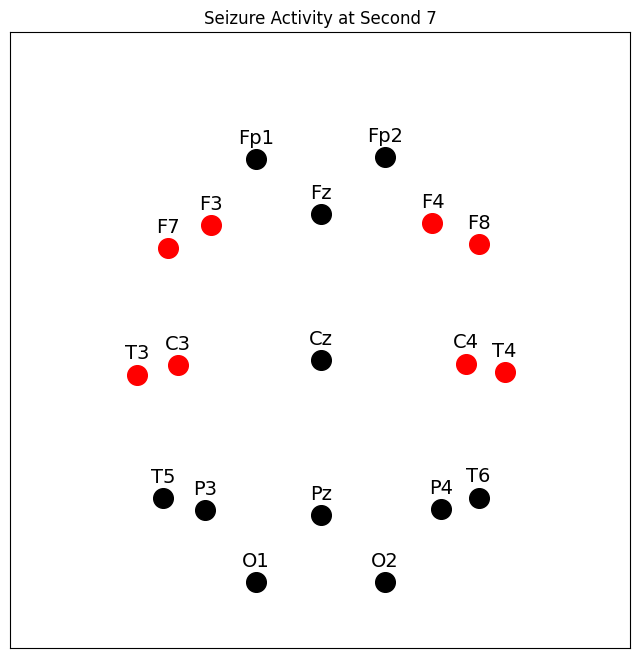

Seizure data at second 8: [0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


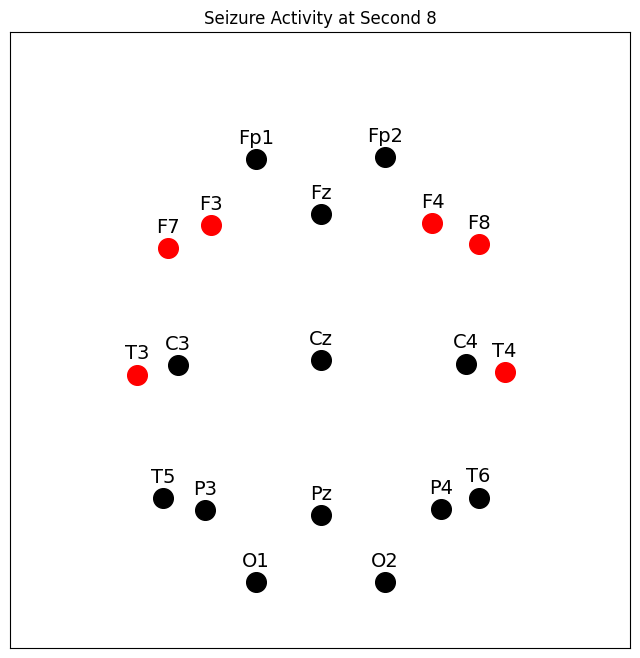

Seizure data at second 9: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


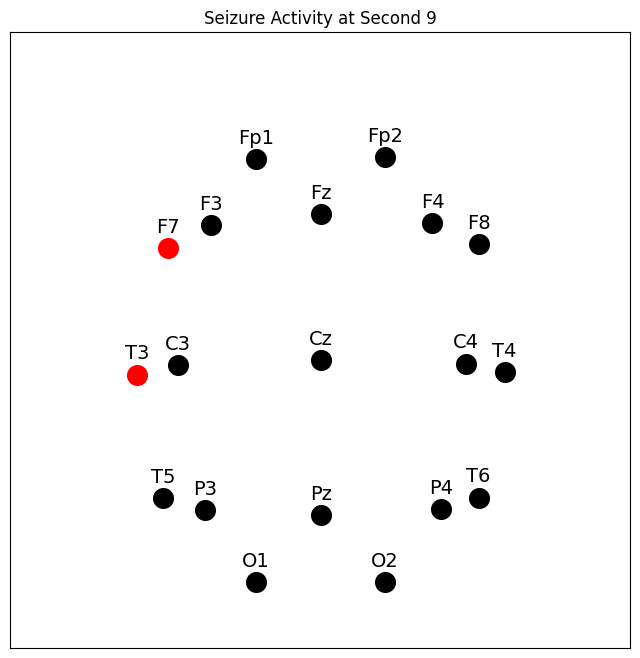

Seizure data at second 11: [0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0]


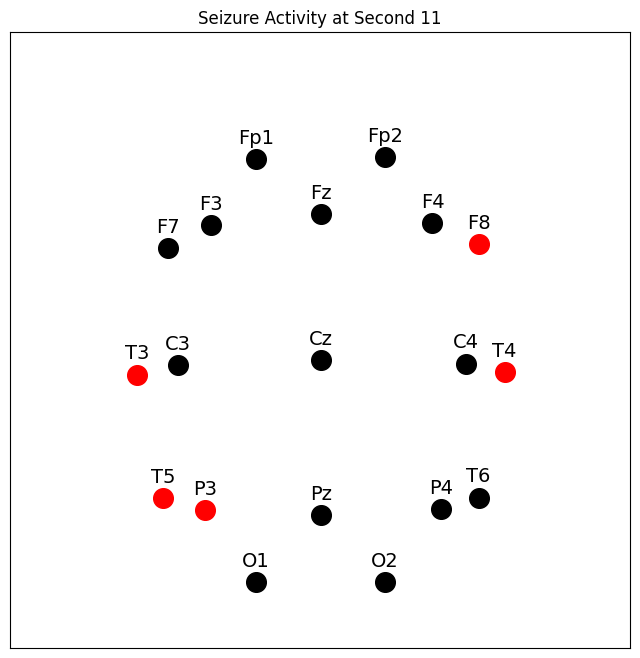

In [43]:
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 7)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 8)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 9)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 11)

Seizure data at second 66: [1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0]


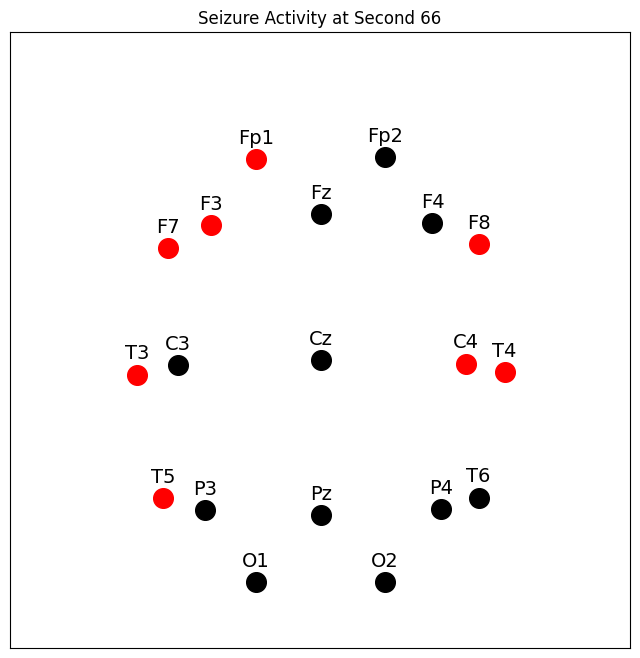

Seizure data at second 66: [1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0]


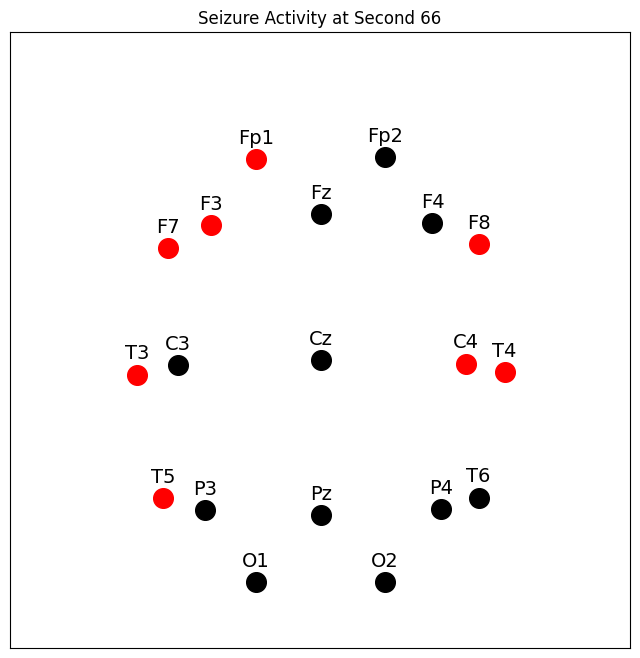

Seizure data at second 68: [1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1]


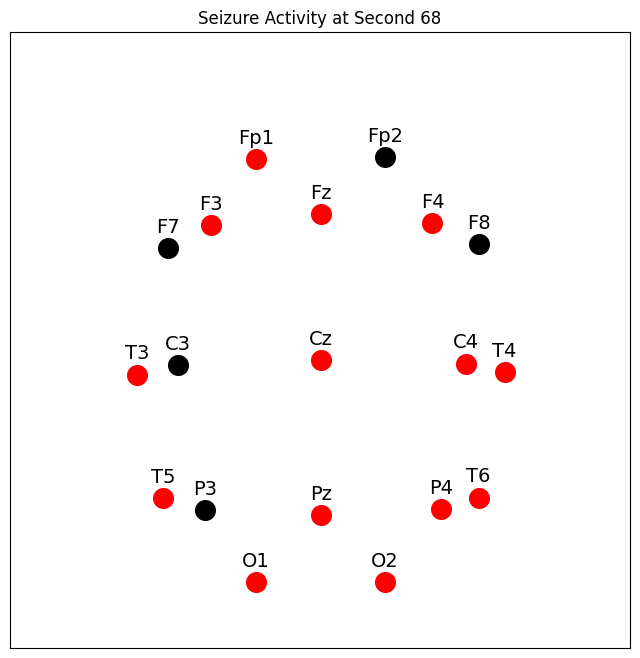

Seizure data at second 69: [0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]


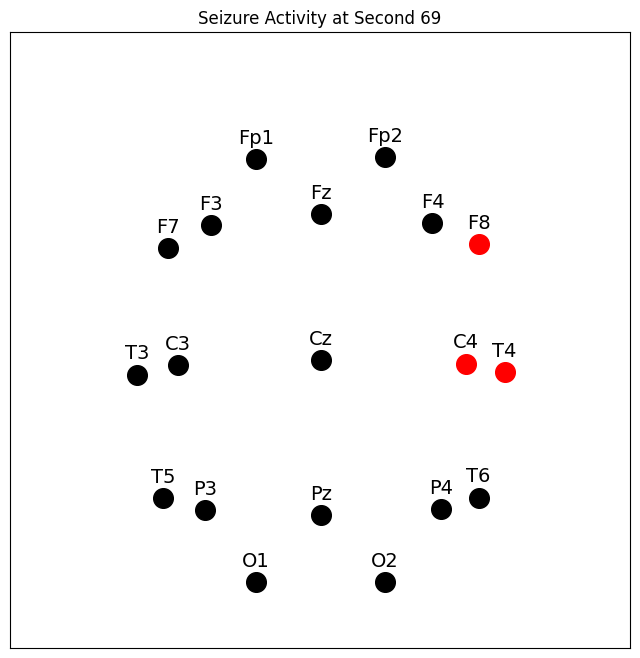

In [45]:
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 66)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 66)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 68)
plot_seizure_activity("PN00/PN00-1/seizure_data_modified.csv", 69)